# Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
rbs = pd.read_csv('../Capstone_csv_file/rbs_final_salary_17-18')
rbs.head()

,NAME,final_rank,salary
0,Melvin Gordon,1.0,2667443
1,Leonard Fournette,3.0,6787711
2,Dion Lewis,4.0,1300000
3,Orleans Darkwa,6.0,1100000
4,Derrick Henry,7.0,1351982


In [3]:
X = rbs['final_rank']
y = rbs['salary']

In [4]:
rbs['Mean_Yhat'] = rbs['salary'].mean()

In [5]:
 def MSE(y_true, y_pred):
    squared_error = 0
    for i in range(len(y_true)):
        squared_error += (y_true[i] - y_pred[i]) ** 2
    return squared_error / len(y_true)

In [6]:
MSE(y, rbs['Mean_Yhat'])

6073998036073.28

In [7]:
np.sqrt(MSE(y, rbs['Mean_Yhat']))

2464548.241782514

In [8]:
def line_of_best_fit(x, y):

    y_bar = y.mean()
    x_bar = x.mean()
    std_y = y.std()
    std_x = x.std()
    r_xy = np.corrcoef(x, y)[0][1]

    beta_1 = r_xy * std_y / std_x
    beta_0 = y_bar - beta_1 * x_bar

    return beta_1 * x + beta_0

In [9]:
rbs['Linear_Yhat'] = line_of_best_fit(X, y)

In [10]:
rbs.head()

,NAME,final_rank,salary,Mean_Yhat,Linear_Yhat
0,Melvin Gordon,1.0,2667443,3.651609e+06,4.564247e+06
1,Leonard Fournette,3.0,6787711,3.651609e+06,4.518851e+06
2,Dion Lewis,4.0,1300000,3.651609e+06,4.496154e+06
3,Orleans Darkwa,6.0,1100000,3.651609e+06,4.450758e+06
4,Derrick Henry,7.0,1351982,3.651609e+06,4.428061e+06


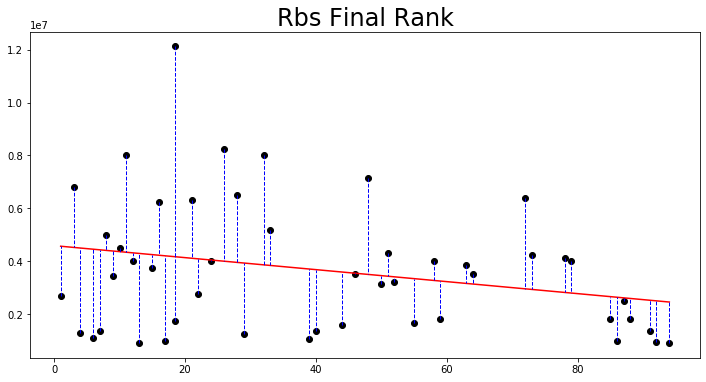

In [11]:
plt.figure(figsize=(12,6))

plt.scatter(X,
            y,
            color = 'black')

plt.plot(X,
         rbs['Linear_Yhat'],
         color = 'red')

for i, row in rbs.iterrows():
    plt.plot((row['final_rank'], row['final_rank']),
             (row['salary'], row['Linear_Yhat']),
             color = 'blue',
             linestyle = '--',
             lw=1)

    plt.title('Rbs Final Rank', fontsize = 24);

In [12]:
model = LinearRegression()

In [13]:
X = rbs[['final_rank']]
y = rbs['salary']

In [14]:
X.shape

(48, 1)

In [15]:
y.shape

(48,)

In [16]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
y_pred = model.predict(X)

In [18]:
np.sqrt(MSE(y, y_pred))

2375357.0142590865

In [19]:
model.intercept_

4586944.610466182

In [20]:
model.coef_

array([-22697.72007198])

In [21]:
r2_score(y, y_pred)

0.07106967903508055